In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# # some_digit = digits['data'][0]
# some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

# plt.show()

In [5]:
y[0]

'5'

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
# sgd_clf.predict([some_digit])

In [11]:
# # cross-validation from scratch (amlost)

# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_folds[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold, y_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct/(len(y_test_fold)))



In [12]:
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [15]:
# because BaseEstimator and SGDClassifier both give approx. same accuracy
# on classifying 5 and not 5, it says nothing about the model, because 10% of the dataset is 5
# so you if you guess image is not 5, you will be (100%-10%) = 90% correct 

In [16]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# ACTUAL CLASS        TN  FP
# PREDICTED CLASS     FN  TP

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [24]:
# y_scores = sgd_clf.decision_function([some_digit])
# y_scores

# threshold = 0 
# y_some_digit_pred = (y_scores > threshold)

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function')

In [29]:
# from sklearn.metrics import precision_recall_curve

# precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
# # computing precision_recall_curve and plotting it
# # gives as precision and recall for all possible thresholds

In [31]:
# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label=Precision)
#     plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
#     plt.legend()
#     plt.grid()
#     plt.x

# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show

In [32]:
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [34]:
# from sklearn.metrics import roc_curve 

# fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal


# plot_roc_curve(fpr, tpr)
# plt.show()




In [44]:
# from sklearn.metrics import roc_auc_score

# roc_auc_score(y_train_5, y_scores)

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [48]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

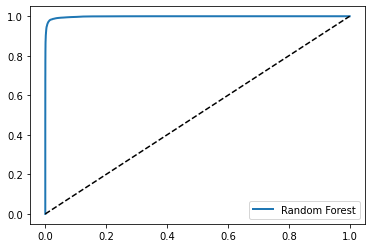

In [51]:
# plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.legend(loc="lower rigth")
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### Multiclass Classification

In [54]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
# svm_clf.predict()

0.9792